In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Thesis_Histone_Modification_Characterization(H3K23me1).tsv', sep='\t')
df_cleaned = df.drop(columns=['ID'])
df_cleaned = df_cleaned.dropna(axis=0, how='any')
df_cleaned.describe()

,H3K27me3,H3K9Ac,H2A.2,H3K4me1,cpg_percentage,H3K9K14Ac,H3K9me2,H3Ac,H3K23me1,H2A.13,...,H4K20me1,H3K36me3,H4K5Ac,chg_percentage,H2A.W.7,H3K9me1,H2A.Z.11,H2A.W.6,H2A.Z.9,Gene Expression (FPKM)
count,27152.000000,27152.000000,27152.000000,27152.000000,27152.000000,27152.000000,27152.000000,27152.000000,27152.000000,27152.000000,...,27152.000000,27152.000000,27152.000000,27152.000000,27152.000000,27152.000000,27152.000000,27152.000000,27152.000000,27152.000000
mean,23.504183,24.365228,21.677214,18.657433,14.416932,28.917289,13.004181,60.540487,18.179305,21.977634,...,14.518770,21.426171,22.943907,2.303556,11.888015,13.827411,24.318456,11.043290,29.928821,28.620294
std,23.456434,18.719804,9.486505,5.285257,20.568596,25.679769,6.508400,69.785588,58.743431,8.497625,...,9.725888,10.366576,12.969775,8.789594,9.360256,7.369334,14.960058,11.472967,20.254348,198.707163
min,0.971016,0.181714,0.000000,2.954120,0.000000,0.000000,0.128422,0.000000,0.075154,0.502681,...,0.441499,3.148754,0.000000,0.000000,2.857985,2.257562,0.797483,0.880878,0.000000,0.000000
25%,10.670151,13.882009,13.928570,15.623919,0.412384,8.480799,10.307959,25.688778,10.687708,15.430633,...,10.411642,12.024503,17.030875,0.216433,8.461673,10.680106,13.002157,7.555239,13.885913,0.340000
50%,13.170611,19.216039,20.609141,18.719127,4.593268,22.149882,11.649465,40.154038,15.126200,21.443055,...,12.823429,20.179839,21.753734,0.359062,9.666724,12.571126,21.110608,8.670248,25.998810,5.370000
75%,24.331371,28.944179,29.075284,21.485388,22.099854,41.119457,13.510929,68.848048,20.973594,28.266337,...,15.865745,30.255546,27.155466,0.578486,11.442284,14.762063,33.203148,10.333736,42.089905,17.952500
max,167.719190,271.380526,136.962454,87.360684,100.000000,169.232638,203.810453,1678.127269,9428.408091,135.063150,...,175.996202,105.015444,305.669927,100.000000,109.647172,116.329111,155.967789,160.848007,140.301288,16434.090000


In [4]:
df_cleaned['expression_category'] = df_cleaned['Gene Expression (FPKM)'].apply(lambda x: 0 if x == 0 else 1)

df_cleaned['expression_category'].value_counts()

expression_category
1    23205
0     3947
Name: count, dtype: int64

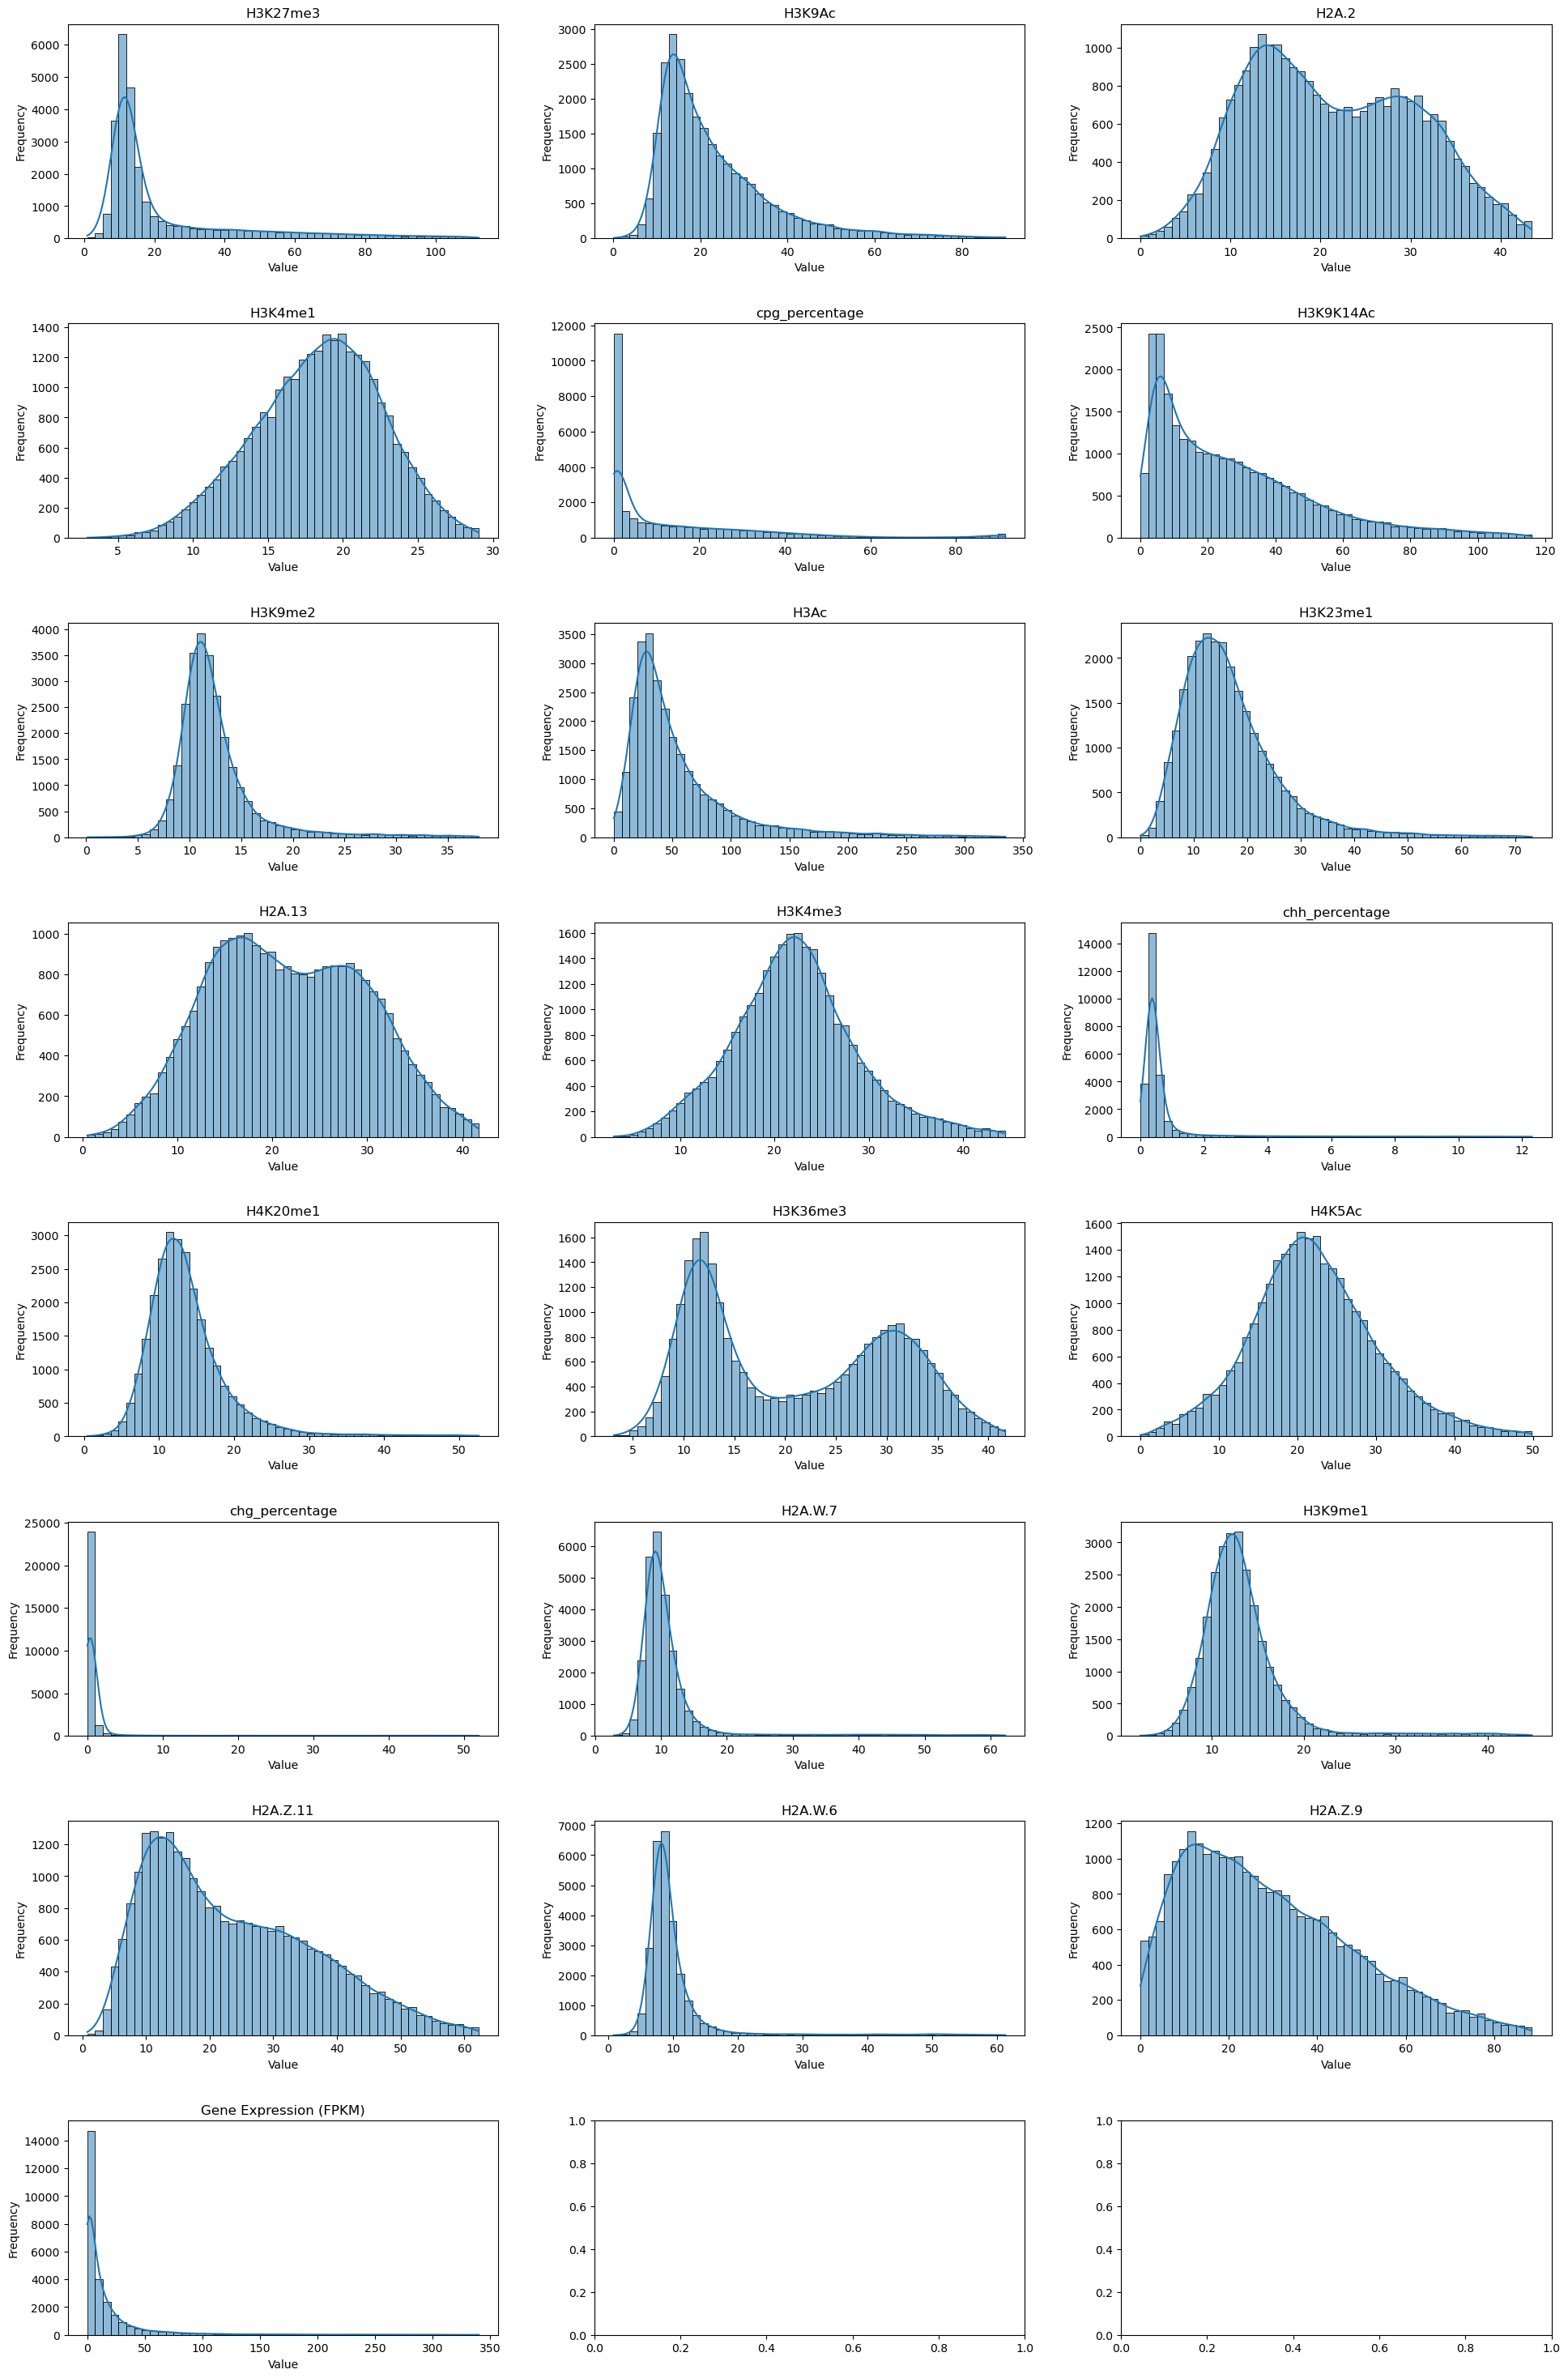

In [5]:
X = df_cleaned.drop(columns=['Gene Expression (FPKM)', 'expression_category'])
y = df_cleaned['Gene Expression (FPKM)']

features = df_cleaned.drop(columns=['expression_category']).columns
filtered_df = df_cleaned.copy()

fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(20, 30))
axes = axes.flatten()

for i, feature in enumerate(features):
    upper_limit = df_cleaned[feature].quantile(0.99)
    sns.histplot(x=df_cleaned[feature][df[feature] < upper_limit], bins=50, kde = True, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout(pad=3.0) 
plt.show()

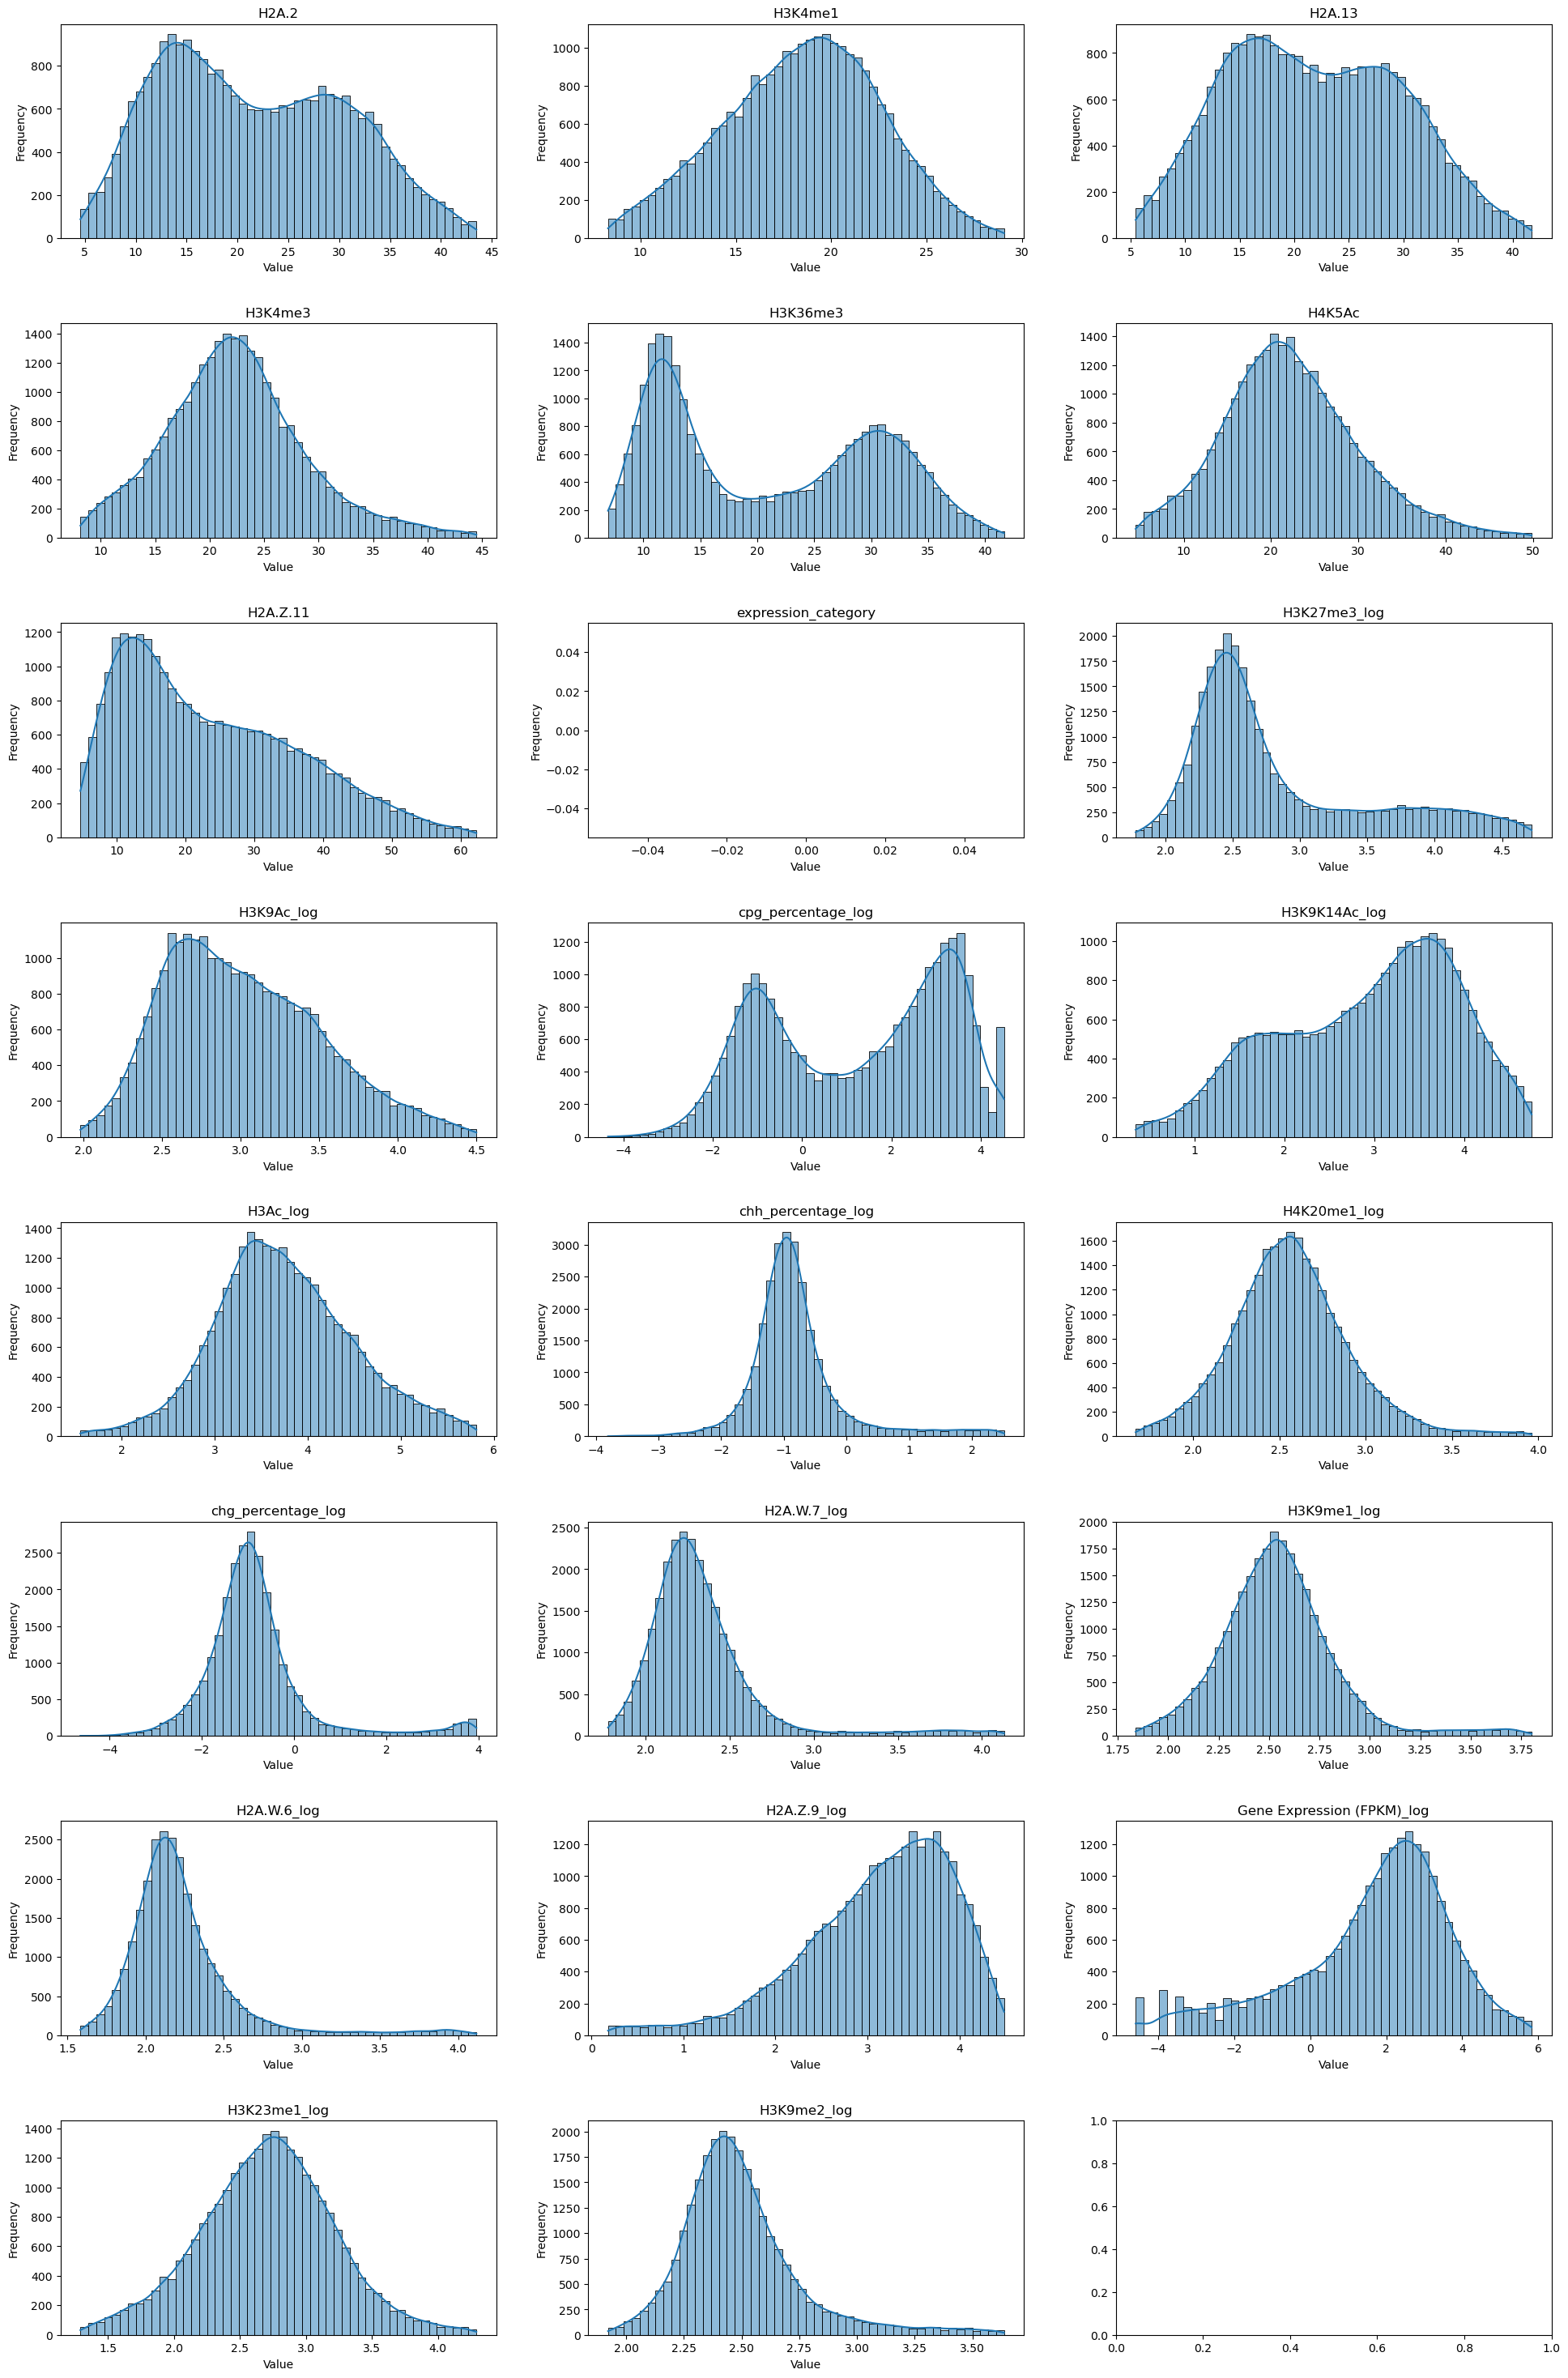

In [7]:
columns_to_log_transform = ['H3K27me3', 'H3K9Ac', 'cpg_percentage', 'H3K9K14Ac', 
                            'H3Ac', 'chh_percentage', 'H4K20me1', 'chg_percentage',
                            'H2A.W.7', 'H3K9me1', 'H2A.W.6', 'H2A.Z.9', 'Gene Expression (FPKM)', 'H3K23me1', 'H3K9me2']


df_transformed = df_cleaned.copy()
for feature in columns_to_log_transform:
    df_transformed[f'{feature}_log'] = np.log(df_transformed[feature]+0.0001)
    df_transformed.drop(columns=[feature], inplace=True)


features = df_transformed.columns

fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(20, 30))
axes = axes.flatten()

for i, feature in enumerate(features):
    upper_limit = df_transformed[feature].quantile(0.99)
    lower_limit = df_transformed[feature].quantile(0.01)
    sns.histplot(x=df_transformed[feature][(df_transformed[feature] < upper_limit) & (df_transformed[feature] > lower_limit)], bins=50, kde = True, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout(pad=3.0) 
plt.show()

In [8]:
df_transformed.describe()

,H2A.2,H3K4me1,H2A.13,H3K4me3,H3K36me3,H4K5Ac,H2A.Z.11,expression_category,H3K27me3_log,H3K9Ac_log,...,chh_percentage_log,H4K20me1_log,chg_percentage_log,H2A.W.7_log,H3K9me1_log,H2A.W.6_log,H2A.Z.9_log,Gene Expression (FPKM)_log,H3K23me1_log,H3K9me2_log
count,27152.000000,27152.000000,27152.000000,27152.000000,27152.000000,27152.000000,27152.000000,27152.000000,27152.000000,27152.000000,...,27152.000000,27152.000000,27152.000000,27152.000000,27152.000000,27152.000000,27152.000000,27152.000000,27152.000000,27152.000000
mean,21.677214,18.657433,21.977634,22.571374,21.426171,22.943907,24.318456,0.854633,2.844442,3.025565,...,-0.854750,2.573540,-1.227771,2.351595,2.554776,2.244765,3.095021,0.081326,2.708301,2.503251
std,9.486505,5.285257,8.497625,7.387024,10.366576,12.969775,14.960058,0.352477,0.714129,0.541767,...,1.186866,0.408311,2.254123,0.409538,0.340345,0.442149,0.949271,4.323351,0.571863,0.314639
min,0.000000,2.954120,0.502681,2.953855,3.148754,0.000000,0.797483,0.000000,-0.029309,-1.704771,...,-9.210340,-0.817353,-9.210340,1.050152,0.814330,-0.126723,-9.210340,-9.210340,-2.586886,-2.051655
25%,13.928570,15.623919,15.430633,18.051163,12.024503,17.030875,13.002157,1.000000,2.367460,2.630601,...,-1.207496,2.342934,-1.530013,2.135559,2.368392,2.022254,2.630882,-1.078516,2.369104,2.332926
50%,20.609141,18.719127,21.443055,22.089070,20.179839,21.753734,21.110608,1.000000,2.577996,2.955750,...,-0.924310,2.551282,-1.023983,2.268700,2.531411,2.159909,3.258055,1.680847,2.716435,2.455269
75%,29.075284,21.485388,28.266337,26.112879,30.255546,27.155466,33.203148,1.000000,3.191771,3.365373,...,-0.599625,2.764169,-0.547168,2.437324,2.692067,2.335424,3.739810,2.887735,3.043269,2.603506
max,136.962454,87.360684,135.063150,94.734995,105.015444,305.669927,155.967789,1.000000,5.122292,5.603522,...,4.166113,5.170463,4.605171,4.697269,4.756424,5.080460,4.943793,9.707113,9.151483,5.317191


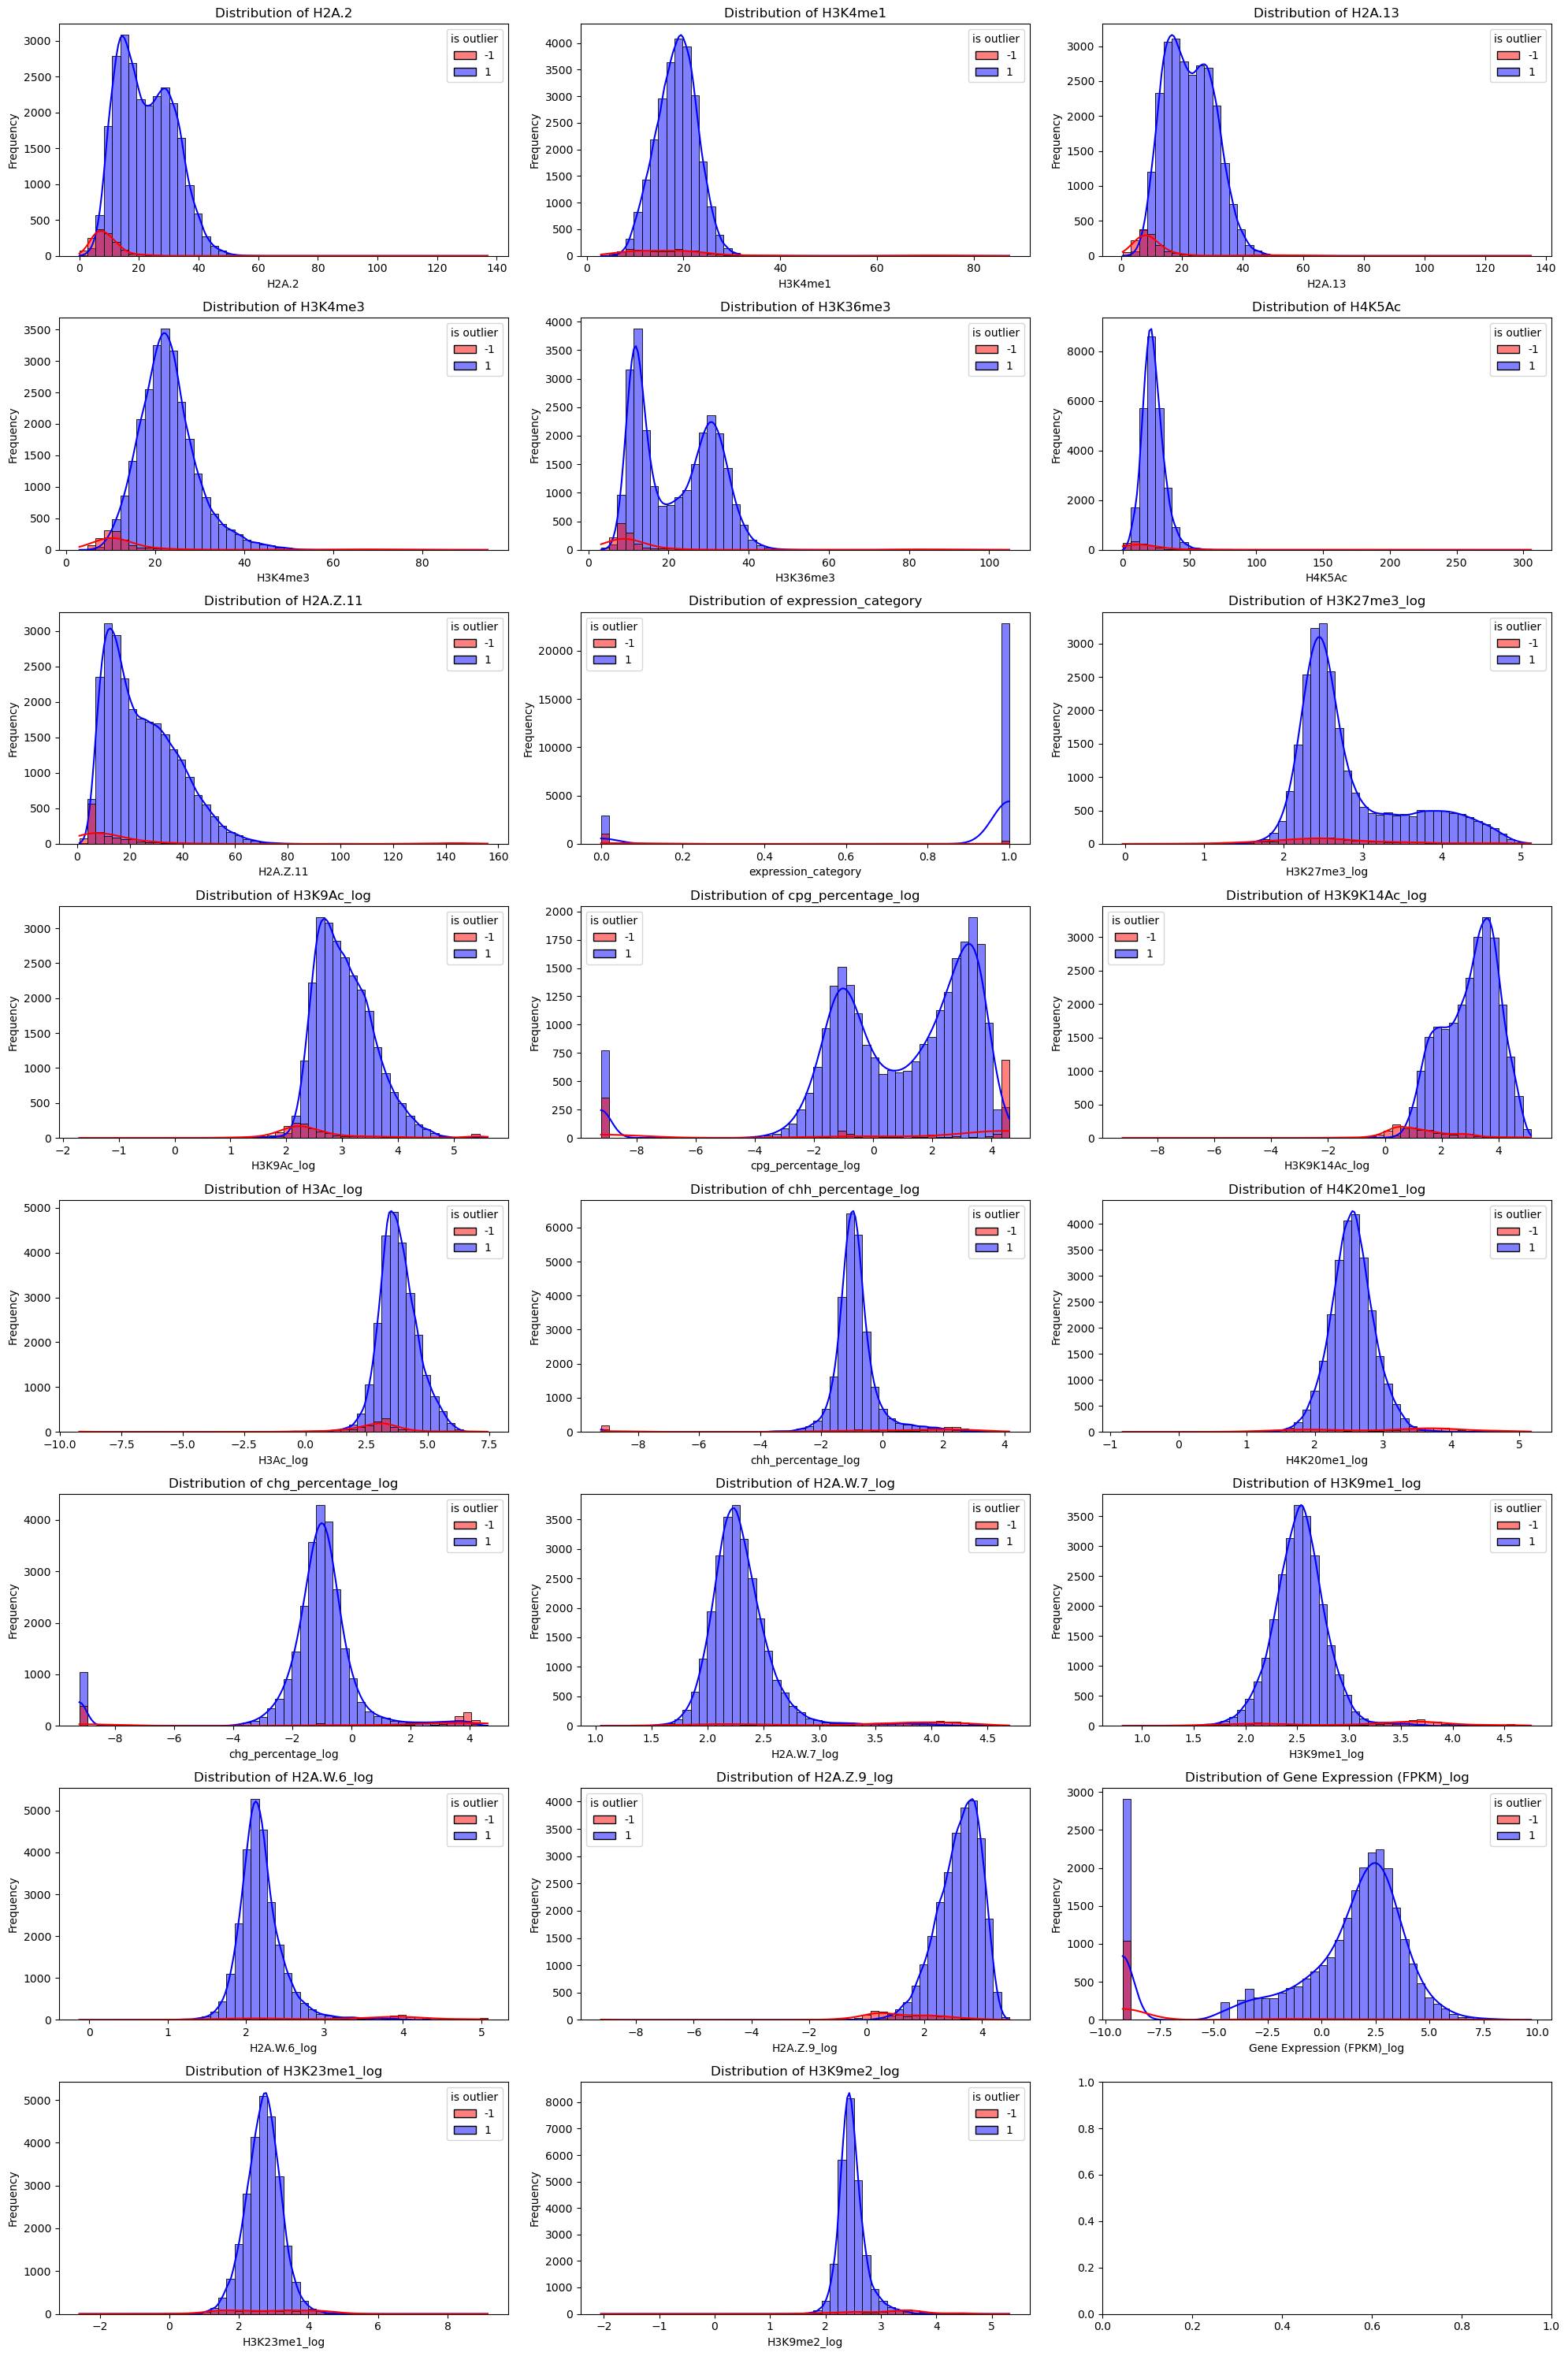

In [9]:
from sklearn.ensemble import IsolationForest


iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(df_transformed)

df_transformed['is outlier'] = iso_forest.predict(df_transformed)

fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(20, 30))
axes = axes.flatten()

for i, feature in enumerate(df_transformed.columns[:-1]):
    sns.histplot(data = df_transformed, x = feature, 
                 hue='is outlier', bins = 50, kde = True, palette = {1: 'blue', -1: 'red'}, 
                 ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}') 
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

In [10]:
df_transformed_cleaned = df_transformed[df_transformed['is outlier'] == 1].drop(columns=['is outlier'])

In [11]:
df_transformed_cleaned

,H2A.2,H3K4me1,H2A.13,H3K4me3,H3K36me3,H4K5Ac,H2A.Z.11,expression_category,H3K27me3_log,H3K9Ac_log,...,chh_percentage_log,H4K20me1_log,chg_percentage_log,H2A.W.7_log,H3K9me1_log,H2A.W.6_log,H2A.Z.9_log,Gene Expression (FPKM)_log,H3K23me1_log,H3K9me2_log
0,20.902491,21.780787,21.709216,22.753021,24.658615,20.698356,30.825020,1,2.257137,3.047825,...,-0.725579,2.834831,-0.663095,2.249764,2.711092,2.157811,3.462258,1.456310,2.828513,2.455275
1,23.740520,15.113436,19.870964,19.515533,23.943244,13.163694,13.115434,1,2.114020,3.086580,...,-0.977337,2.245482,-2.065499,2.023018,2.438172,1.965014,2.550882,1.790108,2.353631,2.190882
2,17.747587,15.150620,19.173416,32.267306,21.883899,21.484286,33.601489,1,4.364481,3.378635,...,-1.476793,2.380941,-3.595025,2.191610,2.287853,2.034952,3.911400,1.747477,2.838775,2.063128
3,37.745676,23.522419,36.108781,21.044304,34.021623,20.185070,7.559050,1,2.553780,2.568995,...,-1.131373,2.805300,-0.807703,2.293433,2.684839,2.178217,1.664626,2.196124,3.270325,2.170332
4,22.483920,15.337061,22.655993,22.021956,26.216809,10.410831,15.680742,1,2.171248,2.973094,...,-1.042688,2.261644,-1.162812,1.952232,2.342968,1.860626,2.643165,4.202004,2.206886,2.343552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27205,9.962122,11.020020,9.865985,27.404037,21.536513,28.266380,27.971742,1,1.985689,3.864066,...,0.050275,2.010079,-0.450140,2.046084,1.906527,1.676567,3.831941,1.885569,1.862827,2.115422
27337,5.923844,18.877985,10.967311,13.365451,14.264383,34.208848,12.217714,1,3.089893,3.292550,...,-0.742678,3.792226,-1.012116,3.282730,3.459067,3.725665,-0.799166,-0.891354,3.217241,3.215516
27365,6.154454,15.440837,8.397569,9.253512,13.102448,22.533547,11.034824,1,2.580411,3.561804,...,-1.171160,3.801813,-0.915394,3.437106,3.291900,3.831230,0.128261,-0.261235,3.796582,2.951977
27367,6.539705,16.416187,8.215530,9.257298,7.156986,36.451975,9.620121,1,2.821927,3.556779,...,-1.343971,3.885650,-1.718929,3.864319,3.354266,3.716822,-0.992179,0.329376,4.553934,2.527772


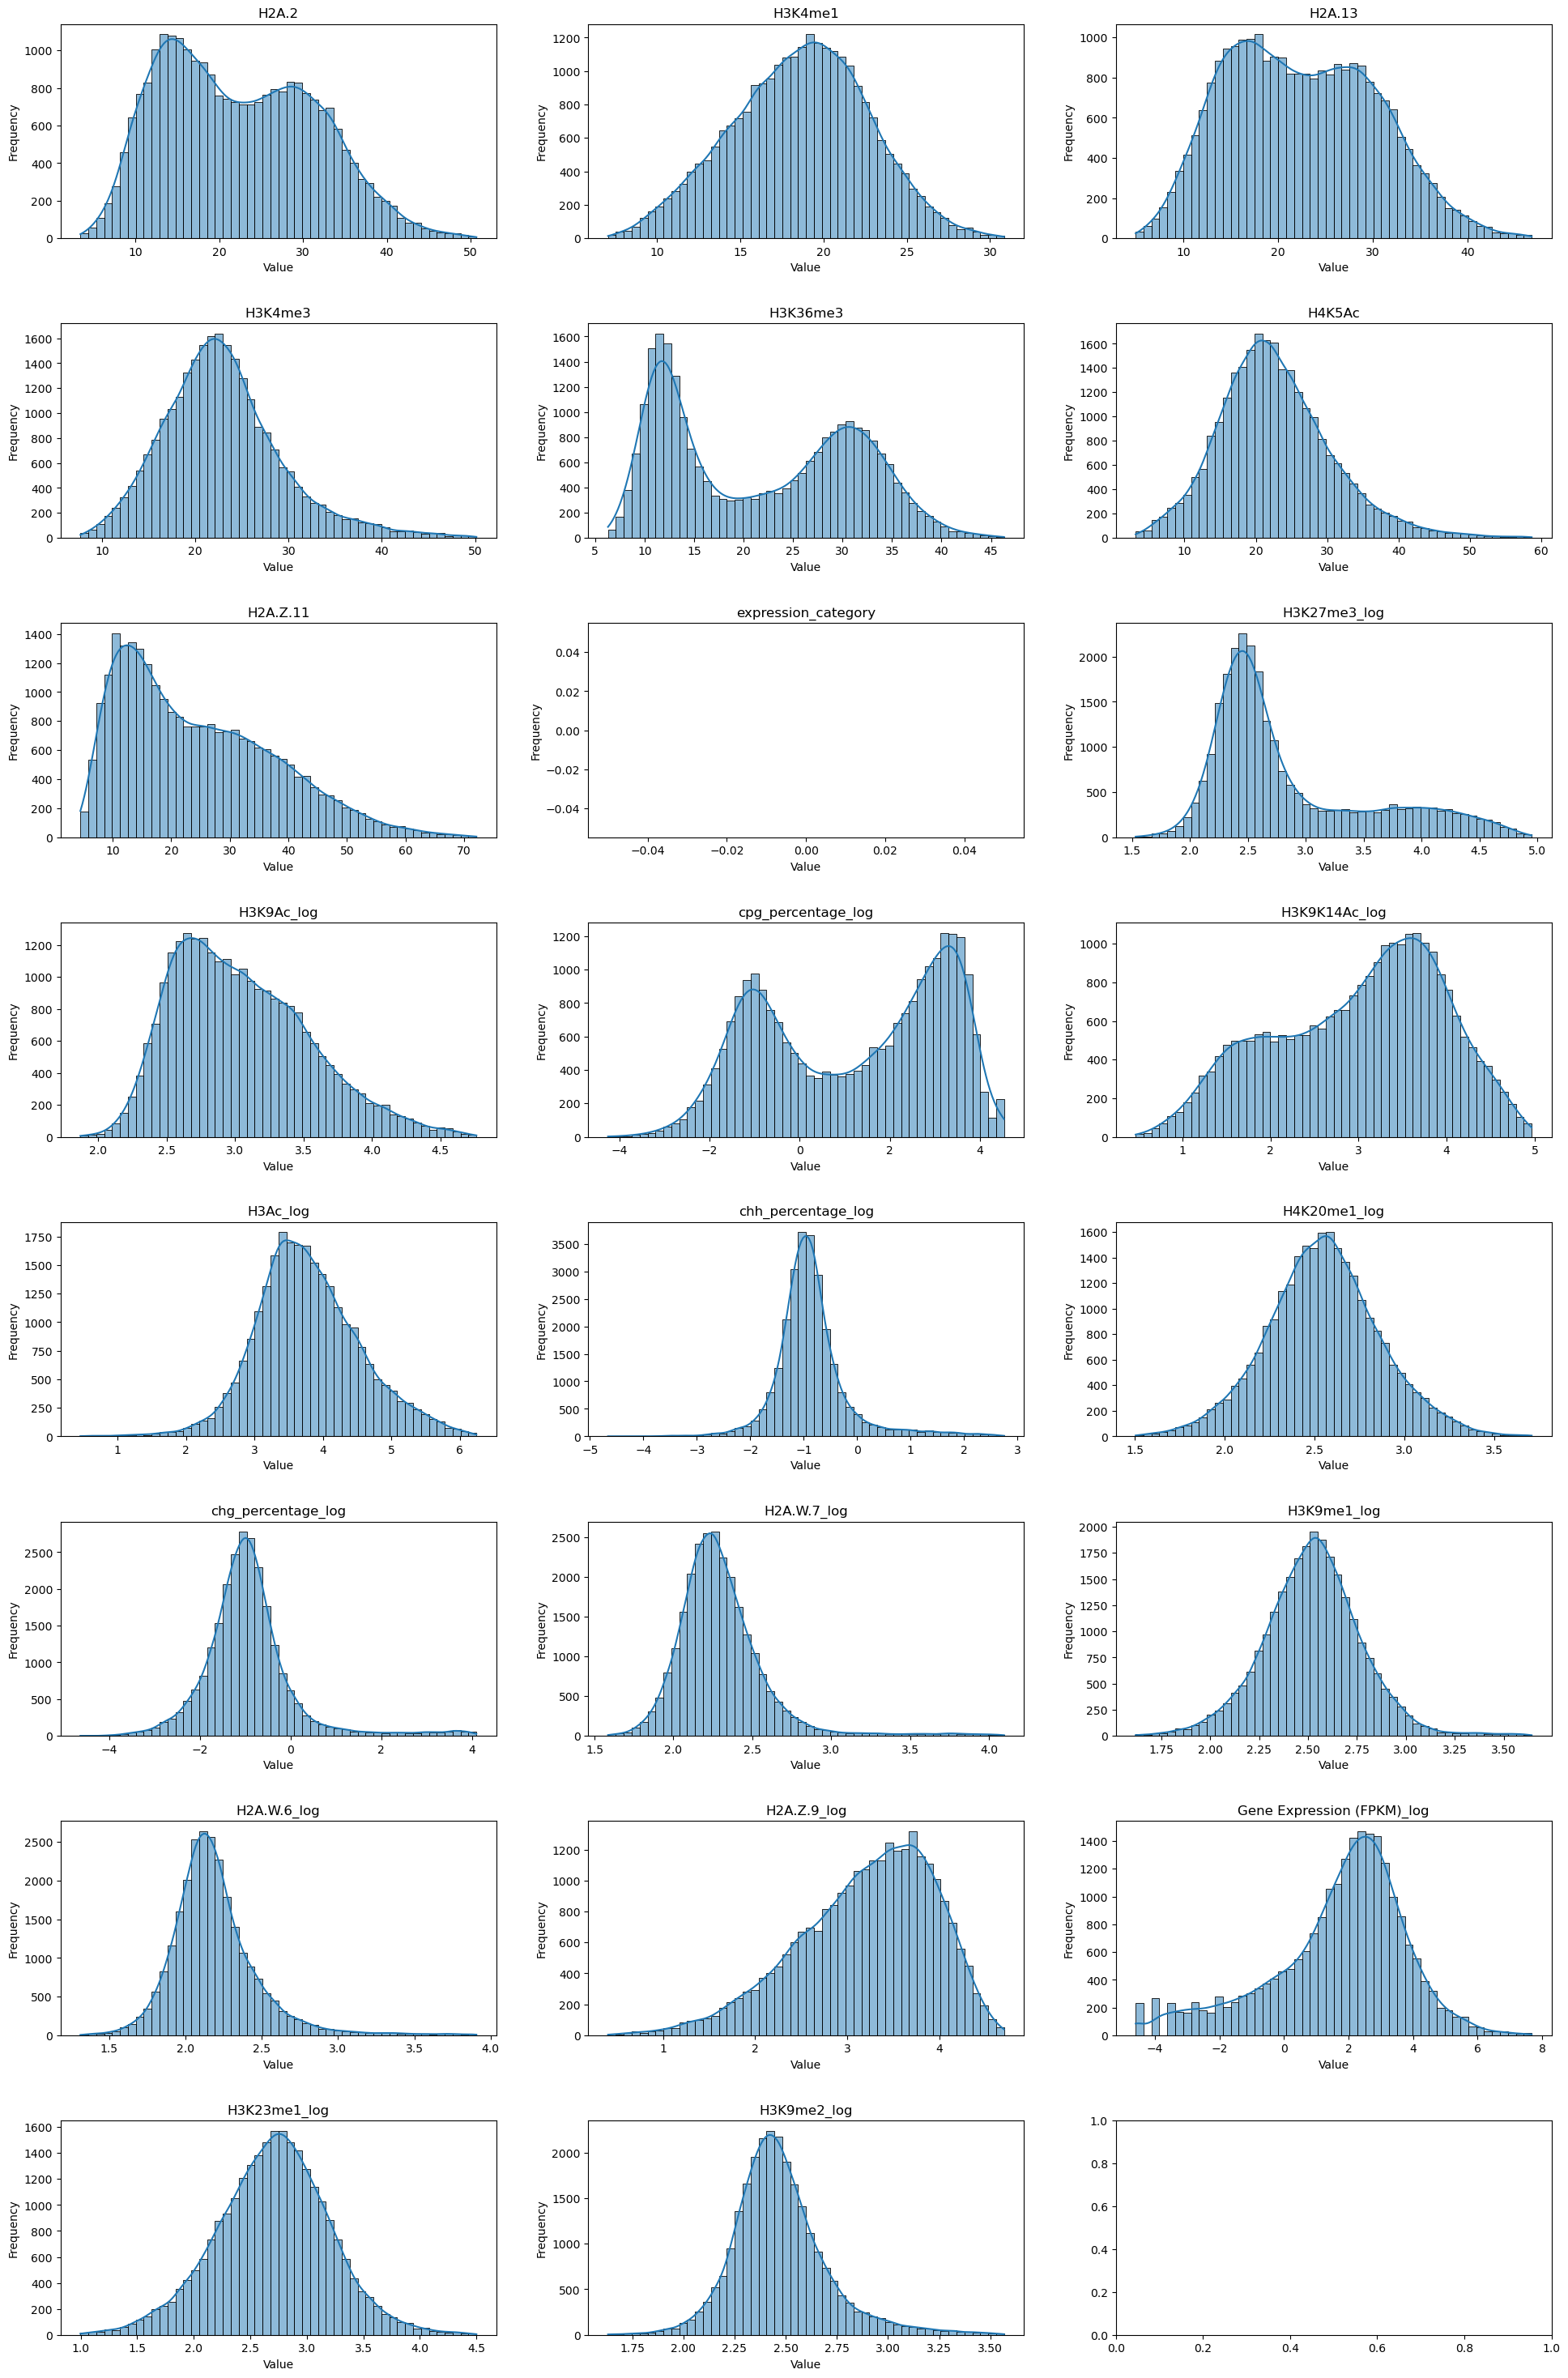

In [13]:
features = df_transformed_cleaned.columns

fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(20, 30))
axes = axes.flatten()

for i, feature in enumerate(features):
    upper_limit = df_transformed_cleaned[feature].quantile(0.999)
    lower_limit = df_transformed_cleaned[feature].quantile(0.001)
    sns.histplot(x=df_transformed_cleaned[feature][(df_transformed[feature] < upper_limit) & (df_transformed[feature] > lower_limit)], bins=50, kde = True, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout(pad=3.0) 
plt.show()

In [14]:
lower_quantile = 0.001
upper_quantile = 0.999

mask = pd.Series(True, index = df_transformed_cleaned.index)

for feature in df_transformed_cleaned.columns:
    lower_limit = df_transformed_cleaned[feature].quantile(lower_quantile)
    upper_limit = df_transformed_cleaned[feature].quantile(upper_quantile)
    mask &= (df_transformed_cleaned[feature] <= upper_limit) & (df_transformed_cleaned[feature] >= lower_limit)
df_transformed_cleaned_quantile = df_transformed_cleaned[mask]

In [15]:
df_transformed_cleaned_quantile.describe()

,H2A.2,H3K4me1,H2A.13,H3K4me3,H3K36me3,H4K5Ac,H2A.Z.11,expression_category,H3K27me3_log,H3K9Ac_log,...,chh_percentage_log,H4K20me1_log,chg_percentage_log,H2A.W.7_log,H3K9me1_log,H2A.W.6_log,H2A.Z.9_log,Gene Expression (FPKM)_log,H3K23me1_log,H3K9me2_log
count,25045.000000,25045.000000,25045.000000,25045.000000,25045.000000,25045.000000,25045.000000,25045.000000,25045.000000,25045.000000,...,25045.000000,25045.000000,25045.000000,25045.000000,25045.000000,25045.000000,25045.000000,25045.000000,25045.000000,25045.000000
mean,22.487637,18.662098,22.645528,22.954304,21.921118,22.677444,24.592780,0.893791,2.854554,3.047952,...,-0.887799,2.547871,-1.260523,2.292738,2.523749,2.183695,3.209084,0.520849,2.699327,2.471488
std,8.988551,4.046783,7.754602,6.275447,9.523958,7.770371,13.080275,0.308111,0.700863,0.488758,...,0.756476,0.305476,1.824959,0.263927,0.240522,0.271012,0.724068,3.907551,0.489856,0.228255
min,3.441818,7.066029,4.954294,7.672183,6.304647,3.165609,4.525310,0.000000,1.529310,1.874085,...,-9.210340,1.509911,-9.210340,1.588998,1.624565,1.310268,0.403433,-9.210340,0.997268,1.631872
25%,14.896367,15.891959,16.342547,18.790774,12.469411,17.439247,13.632224,1.000000,2.373926,2.664295,...,-1.206924,2.350665,-1.520274,2.132600,2.373572,2.020727,2.744207,-0.370919,2.387442,2.331826
50%,21.670355,18.817420,22.167338,22.381741,21.973320,21.961251,21.939322,1.000000,2.577287,2.982506,...,-0.939229,2.545956,-1.039179,2.259224,2.527070,2.150947,3.306844,1.834196,2.713249,2.447736
75%,29.532407,21.483595,28.533691,26.230946,30.526152,27.139932,33.652347,1.000000,3.207587,3.372260,...,-0.646768,2.740591,-0.605741,2.410691,2.672450,2.305004,3.757631,2.933862,3.019540,2.581106
max,50.498810,30.839472,46.644002,49.965170,46.318101,58.375773,71.995265,1.000000,4.952035,4.762968,...,2.748008,3.707023,4.098032,4.095839,3.642703,3.906534,4.690665,7.677224,4.501172,3.563349


In [16]:
df_transformed_cleaned_quantile.to_csv('thesis_cleaned_transformed_histone_dataset_categorical(H3K23me1).tsv', sep='\t', index = False)